In [1]:
#importing libraries
import numpy
from matplotlib import pyplot
%matplotlib inline

#discretizing time
T=100.0
dt = 0.02
N=int(T/dt)+1
t=numpy.linspace(0.0, T, N)

In [2]:
#initial values
z0=100.
b0=10.
zt=100.
g=9.81



In [3]:
u=numpy.array([z0, b0])

z=numpy.zeros(N)

z[0]=z0

for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

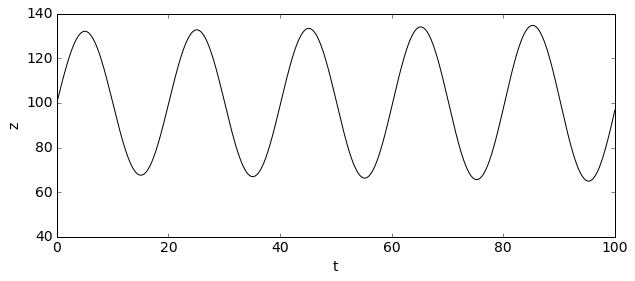

In [4]:
pyplot.figure(figsize=(10, 4))
pyplot.ylim(40, 140)
pyplot.tick_params(axis='both', labelsize=14)
pyplot.xlabel('t', fontsize=14)
pyplot.ylabel('z', fontsize=14)
pyplot.plot(t, z, '-k')

In [5]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
            (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

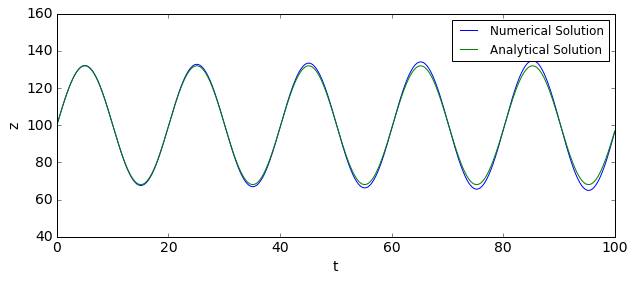

In [6]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

In [7]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001])


In [8]:
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

In [9]:
def get_error(z, dt):
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [10]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    error_values[i] = get_error(z_values[i], dt)

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

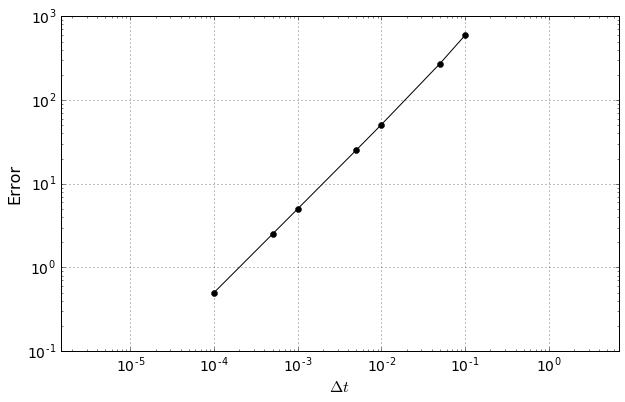

In [11]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

In [12]:
def Eulers_method(u, f, dt, T):
    #implement eulers method for any function and intial parameters
    #--------------------------
    #u initial values
    #u=f'
    #dt, time step
    #T = final time
    #-----------------
    #return an array with the consecutive values of u[0]
    N = int(T/dt)+1
    z=numpy.zeros(N)
    z[0]=u[0]
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*f(u)
        z[n] = u[0]
    return z

def get_error(z, dt, f):
    #approximate solution
    #timestep
    #analytical solution
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = f(t)
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

In [14]:
def f(u):
    return numpy.array([u[1], g*(1-u[0]/zt)])

def sol(t):
    return b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt